# Problem Statement
Predict whether a patient will have a heart stroke or not based on his/her comorbidities, work, and lifestyle. 

# 1. Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 3. Exploratory Data Analysis

###### Tableau Dashboard : 
https://public.tableau.com/views/Stroke_prediction/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
cat_var = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_cat = df[cat_var]
for i in df_cat.columns:
    print(i,':',df_cat[i].unique())
    print(i,':')
    print(df_cat[i].value_counts())
    print('===============================###===============================')

gender : ['Male' 'Female' 'Other']
gender :
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
===============================###===============================
ever_married : ['Yes' 'No']
ever_married :
Yes    3353
No     1757
Name: ever_married, dtype: int64
===============================###===============================
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
work_type :
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
===============================###===============================
Residence_type : ['Urban' 'Rural']
Residence_type :
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
===============================###===============================
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
smoking_status :
never smoked       1892
Unknown            1544
formerly smoked     885
smokes          

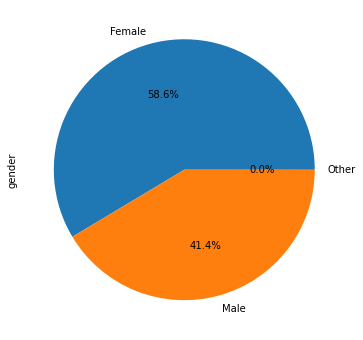

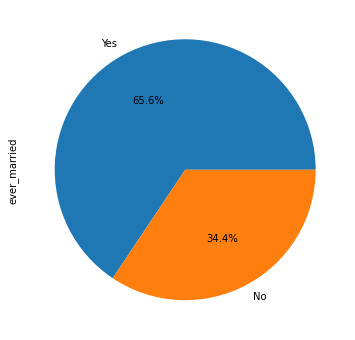

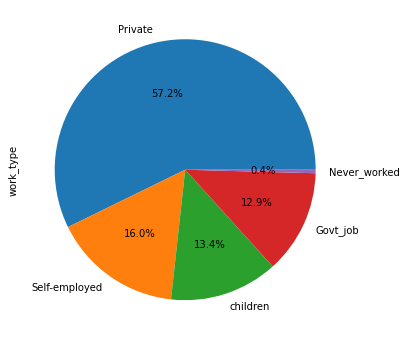

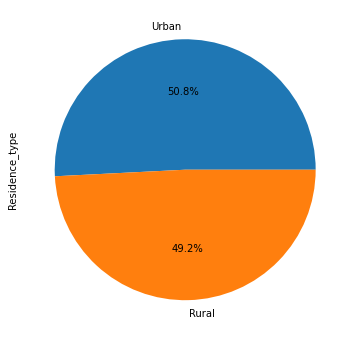

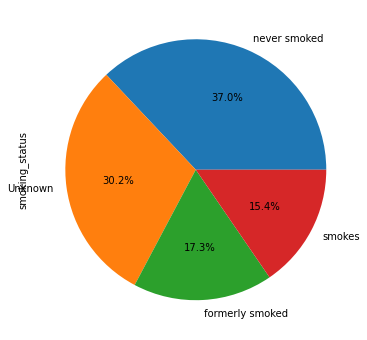

In [9]:
for i in df_cat.columns:
    plt.figure(figsize=(15,6))
    df_cat[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

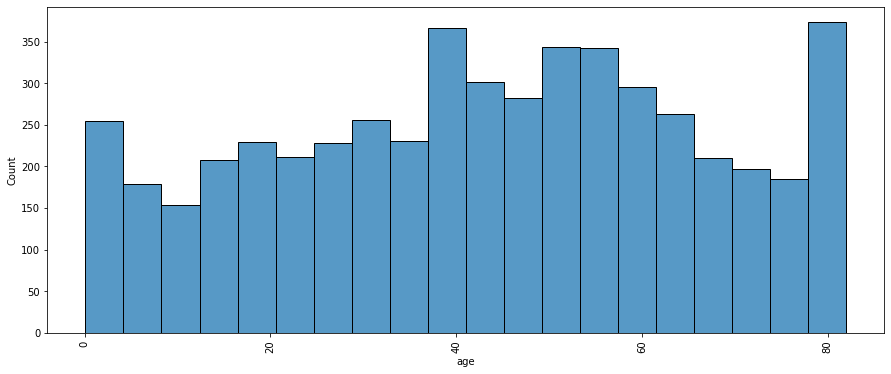

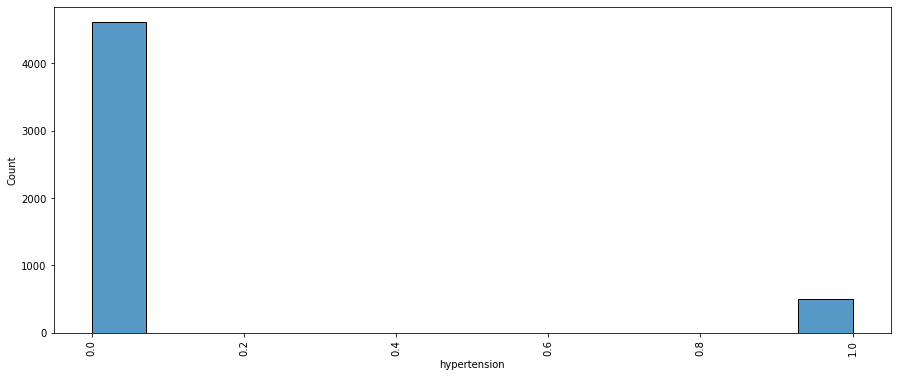

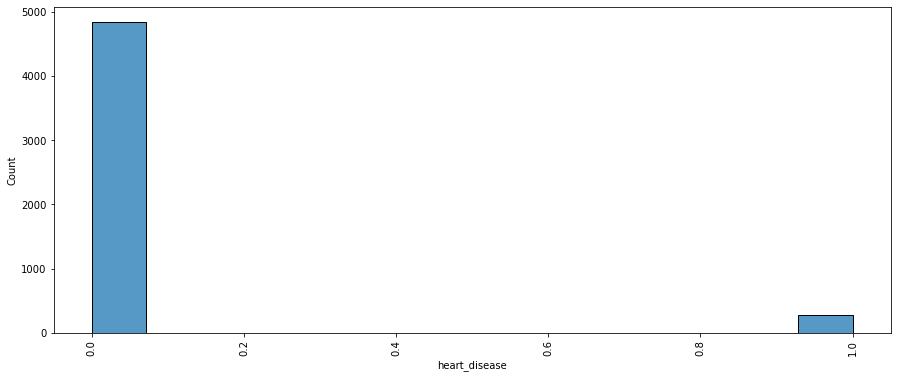

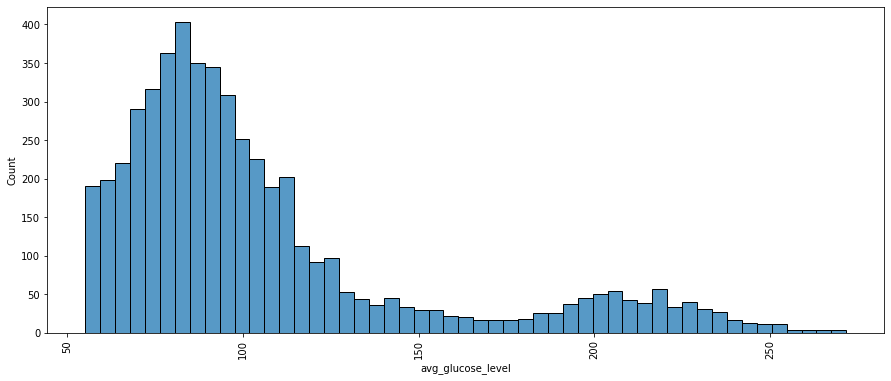

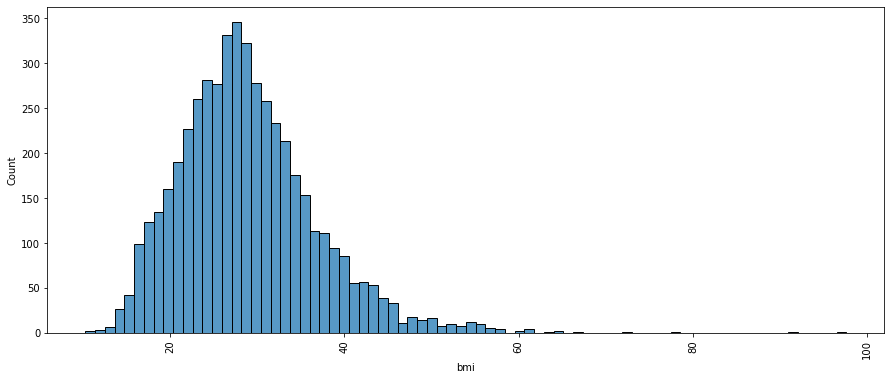

In [10]:
df_num = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
for i in df_num.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(df_num[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [11]:
# 1. Impact of smoking status on stroke

In [12]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
df1 = df[df['smoking_status']=='smokes']
df1[df1['stroke']==1].shape

(42, 12)

In [14]:
df1 = df[df['smoking_status']=='never smoked']
df1[df1['stroke']==1].shape

(90, 12)

In [15]:
df1 = df[df['smoking_status']=='formerly smoked']
df1[df1['stroke']==1].shape

(70, 12)

In [16]:
df1 = df[df['smoking_status']=='smokes']
df1[df1['stroke']==1].shape

(42, 12)

In [17]:
df.groupby(['stroke','smoking_status'])[['stroke']].count()

stroke
stroke smoking_status         
0      Unknown            1497
       formerly smoked     815
       never smoked       1802
       smokes              747
1      Unknown              47
       formerly smoked      70
       never smoked         90
       smokes               42

In [18]:
df.groupby(['stroke','work_type','gender'])[['stroke']].count()

stroke
stroke work_type     gender        
0      Govt_job      Female     376
                     Male       248
       Never_worked  Female      11
                     Male        11
       Private       Female    1678
                     Male      1097
                     Other        1
       Self-employed Female     464
                     Male       290
       children      Female     324
                     Male       361
1      Govt_job      Female      23
                     Male        10
       Private       Female      76
                     Male        73
       Self-employed Female      40
                     Male        25
       children      Female       2

In [19]:
# Treating missing values

In [20]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

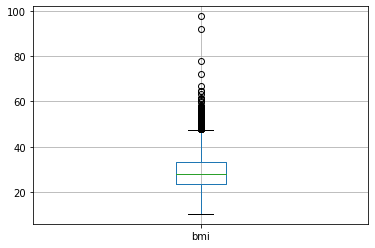

In [21]:
df[['bmi']].boxplot()

It’s better to use the median value for imputation in the case of outliers. Median is the middlemost value. 

In [22]:
#Replacing using median
median = df['bmi'].median()
df['bmi'].fillna(median, inplace=True)

In [23]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [24]:
df['ever_married'] = [ 0 if i !='Yes' else 1 for i in df['ever_married'] ]
df['Residence_type'] = [0 if i != 'Urban' else 1 for i in df['Residence_type']]
df.head()

df = pd.get_dummies(df, columns = ['gender','work_type','smoking_status'])
df.drop('id',axis=1,inplace=True)
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.1,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.1,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,1,125.20,40.0,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.6,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,1,0,0,0,1,0,0


In [25]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

classifier_log= LogisticRegression(random_state=0)  
classifier_log.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [26]:
y_pred= classifier_log.predict(X_test)

cm= confusion_matrix(y_test,y_pred)
print(cm)

[[960   0]
 [ 62   0]]


In [27]:
print('Training-set accuracy score:', classifier_log.score(X_train, y_train))
print('Test-set accuracy score:', classifier_log.score(X_test, y_test))

Training-set accuracy score: 0.9542563600782779
Test-set accuracy score: 0.9393346379647749


### ????????????

In [28]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [29]:
print('{}% of the total people have stroke.'.format(round((249/(4861+249))*100,4)))
print('{}% of the total people have not stroke.'.format(round((4861/(4861+249))*100,4)))

4.8728% of the total people have stroke.
95.1272% of the total people have not stroke.


### The data is imbalanced, which is causing the model to give bad performance .

#### Treating Imbalanced data

#### SMOTE (Synthetic Minority Oversampling Technique) – Oversampling
* It aims to balance class distribution by randomly increasing minority class examples by replicating them.
* After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [30]:
balanced_data = SMOTE(random_state=0)

X = df.drop(['stroke'],axis=1)
y = df[['stroke']]

X.shape,y.shape #original shape of dataset
 

((5110, 19), (5110, 1))

In [31]:
X_b,y_b = balanced_data.fit_sample(X,y)

X_b.shape,y_b.shape #shape of dataset after treating imbalanced data.

((9722, 19), (9722, 1))

In [32]:
Xb_train, Xb_test,yb_train,yb_test = train_test_split(X_b,y_b,test_size=0.20,random_state=10)

In [33]:
classifier_log= LogisticRegression(random_state=0)  
classifier_log.fit(Xb_train, yb_train)  

LogisticRegression(random_state=0)

In [34]:
Xb_train.shape, Xb_test.shape 

((7777, 19), (1945, 19))

In [35]:
y_pred= classifier_log.predict(Xb_test)
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(yb_test,y_pred)
print(cm)

[[962  36]
 [ 87 860]]


In [36]:
print('Training-set accuracy score:', classifier_log.score(Xb_train, yb_train))
print('Test-set accuracy score:', classifier_log.score(Xb_test, yb_test))

Training-set accuracy score: 0.9396939693969397
Test-set accuracy score: 0.9367609254498714


# CONCLUSION :
1. The data obtained by applying SMOTE technique is giving good results.
2. The married individuals living in urbam and working in Private sector have the higher chances to get a heart stroke.